# Johnson & Johnson Stock Analysis
## Group 3
### Aashish Kurimilla - W0833509
### Nrupendra Kumar - W0836757
### Sai Anudeep Janapareddy - W0836698
### Chaithanya Keshavabhakthula - W0851954
### Syed Mohamed Yousuf Ismail Maraika - W0837472


### 5 year of JNJ stock data

In [14]:
import yfinance as yf
import pandas as pd

# Define tickers and time period
tickers = ['JNJ', '^GSPC']
start_date = '2024-01-01'
end_date = '2024-12-31'

# Download monthly data
data = yf.download(tickers, start=start_date, end=end_date, interval='1mo')

# Save to xlsx
data.to_excel('JNJ_sp500_monthly.xlsx')

print("Data downloaded and saved as JNJ_sp500_monthly.xlsx")

[*********************100%***********************]  2 of 2 completed

Data downloaded and saved as JNJ_sp500_monthly.xlsx


### 4. Technical Analysis & Monte Carlo Simulation

### Bollinear Band

In [15]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Download JNJ historical stock price data
jnj_data = yf.download("JNJ", start="2024-01-01", end="2024-12-31")
jnj=jnj_data.copy()
print()
print(jnj.head())

[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open   Volume
Ticker             JNJ         JNJ         JNJ         JNJ      JNJ
Date                                                               
2024-01-02  153.829590  155.435486  150.771646  150.906271  9622100
2024-01-03  154.791199  155.243159  153.666111  154.473864  8232000
2024-01-04  154.464249  155.762420  154.262303  155.387391  6766600
2024-01-05  154.945053  155.146984  153.348768  154.339231  5602500
2024-01-08  155.329697  155.454711  153.483397  154.916209  6569800


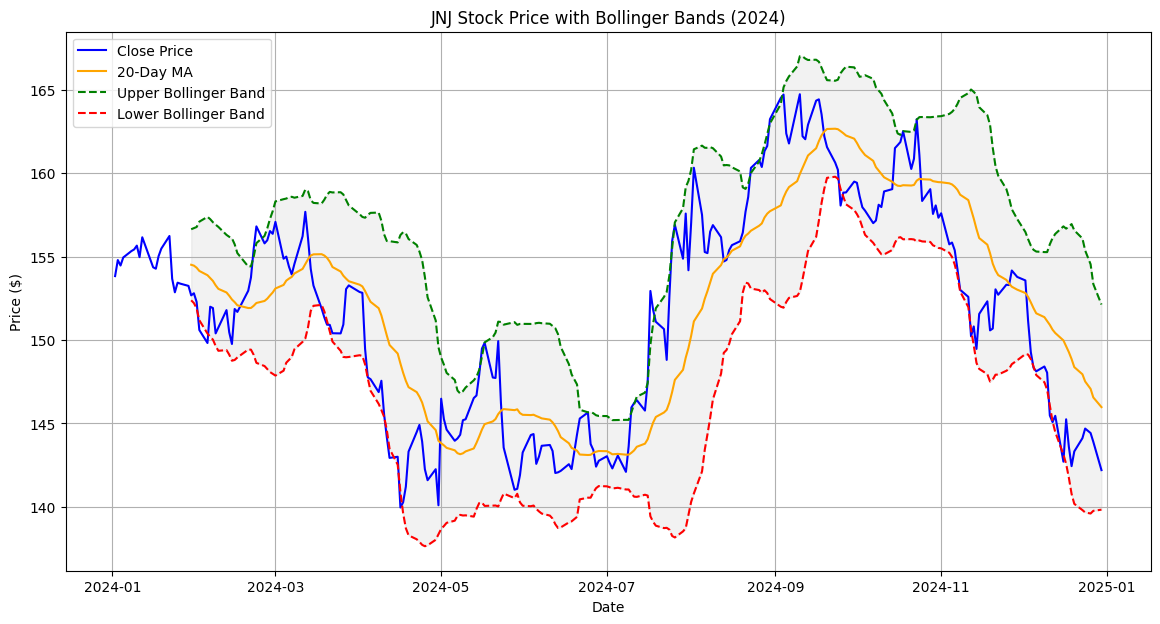

In [16]:
# Calculate 20-day Moving Average
jnj['MA20'] = jnj['Close'].rolling(window=20).mean()

# Calculate 20-day Standard Deviation
jnj['STD20'] = jnj['Close'].rolling(window=20).std()

# Calculate Upper and Lower Bollinger Bands
jnj['Upper Band'] = jnj['MA20'] + (2 * jnj['STD20'])
jnj['Lower Band'] = jnj['MA20'] - (2 * jnj['STD20'])

# Plot the Bollinger Bands
plt.figure(figsize=(14, 7))
plt.plot(jnj['Close'], label='Close Price', color='blue')
plt.plot(jnj['MA20'], label='20-Day MA', color='orange')
plt.plot(jnj['Upper Band'], label='Upper Bollinger Band', color='green', linestyle='--')
plt.plot(jnj['Lower Band'], label='Lower Bollinger Band', color='red', linestyle='--')
plt.fill_between(jnj.index, jnj['Lower Band'], jnj['Upper Band'], color='gray', alpha=0.1)
plt.title('JNJ Stock Price with Bollinger Bands (2024)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


### Monte Carlo Simulation

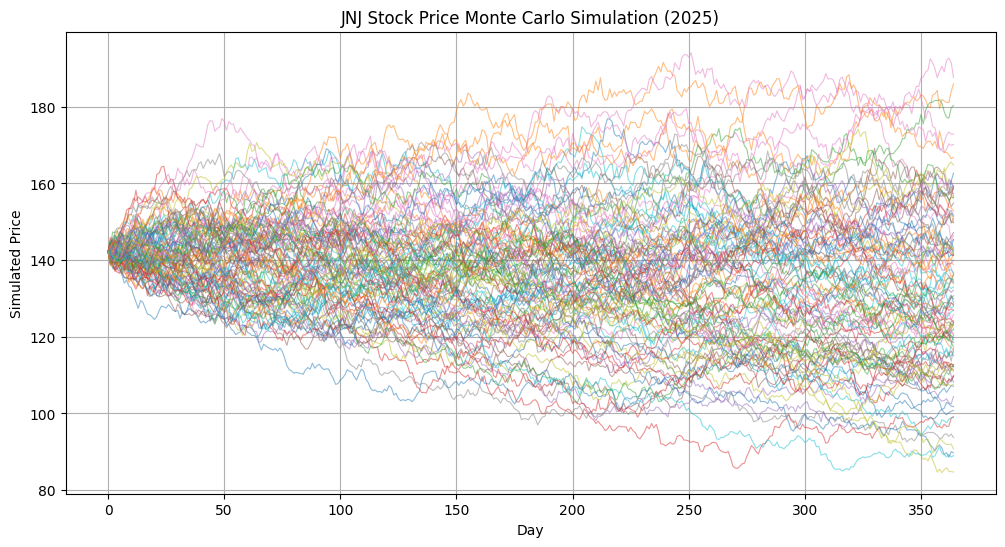

Start Price (Dec 31, 2024): $142.20
Expected Average Return: -10.82%
Standard Deviation of Return: 16.19%


In [17]:
import numpy as np

# Step 1: Load data
data = jnj['Close']
data = data.dropna()

# Step 2: Calculate daily log returns
log_returns = np.log(data / data.shift(1)).dropna()
mu = log_returns.mean()
sigma = log_returns.std()
start_price = data.iloc[-1]

# Step 3: Set simulation parameters
days = 365              # Simulate 1 trading year (2025)
simulations = 10000     # Number of Monte Carlo simulations

# Step 4: Initialize array for simulated prices
simulated_prices = np.zeros((days, simulations))
simulated_prices[0, :] = start_price  # Set starting price for all simulations

# Step 5: Run simulation
for t in range(1, days):
    rand = np.random.normal(0, 1, simulations)
    # Extract the numeric values of mu and sigma using .iloc[0]
    simulated_prices[t, :] = simulated_prices[t - 1, :] * np.exp((mu.iloc[0] - 0.5 * sigma.iloc[0]**2) + sigma.iloc[0] * rand)

# Step 6: Plot results
plt.figure(figsize=(12, 6))
plt.plot(simulated_prices[:, :100], linewidth=0.8, alpha=0.5)
plt.title('JNJ Stock Price Monte Carlo Simulation (2025)')
plt.xlabel('Day')
plt.ylabel('Simulated Price')
plt.grid(True)
plt.show()

# Step 7: Analyze results
final_prices = simulated_prices[-1]
returns = (final_prices - start_price.iloc[0]) / start_price.iloc[0]

print(f"Start Price (Dec 31, 2024): ${start_price.iloc[0]:.2f}")
print(f"Expected Average Return: {np.mean(returns):.2%}")
print(f"Standard Deviation of Return: {np.std(returns):.2%}")

### 5. JNJ Stock Signals

In [18]:
import datetime
from tabulate import tabulate

In [19]:
#Read the file
df=jnj_data.copy()

In [20]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,JNJ,JNJ,JNJ,JNJ,JNJ
Date,,,,,
2024-01-02,153.829590,155.435486,150.771646,150.906271,9622100
2024-01-03,154.791199,155.243159,153.666111,154.473864,8232000
2024-01-04,154.464249,155.762420,154.262303,155.387391,6766600
2024-01-05,154.945053,155.146984,153.348768,154.339231,5602500
2024-01-08,155.329697,155.454711,153.483397,154.916209,6569800


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, JNJ)   251 non-null    float64
 1   (High, JNJ)    251 non-null    float64
 2   (Low, JNJ)     251 non-null    float64
 3   (Open, JNJ)    251 non-null    float64
 4   (Volume, JNJ)  251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


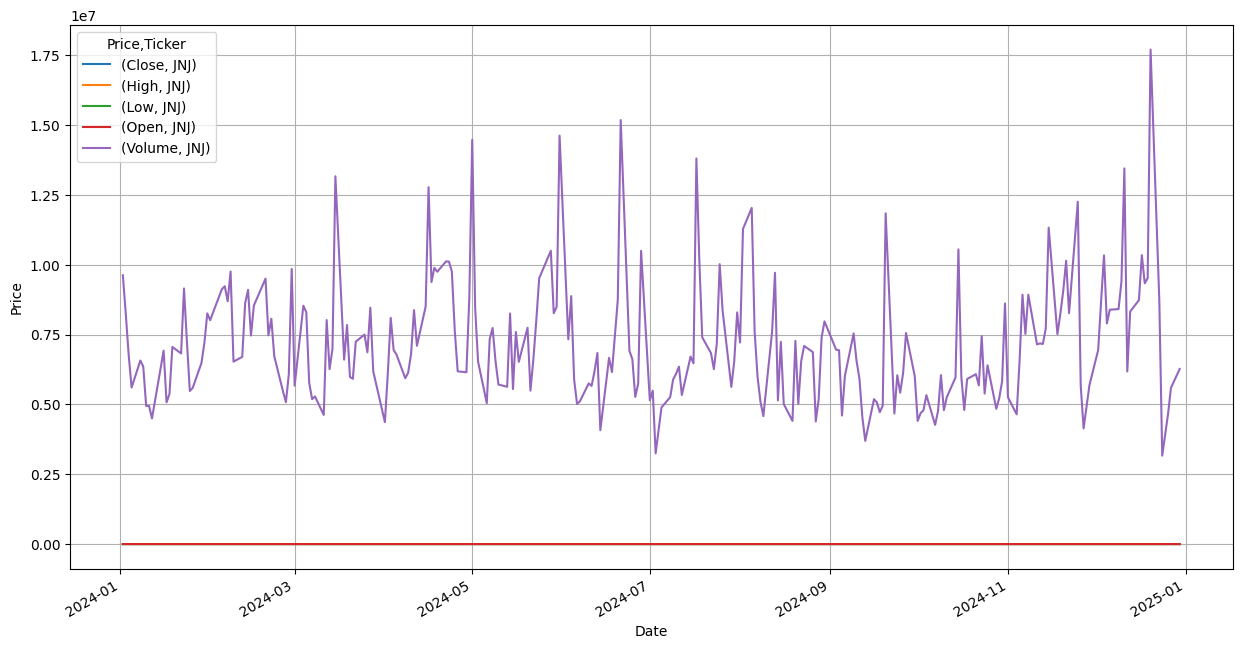

In [22]:
df.plot(figsize = (15, 8))
plt.grid()
plt.ylabel("Price")
plt.show()

### Simple Moving Average Technique (JNJ Stock)

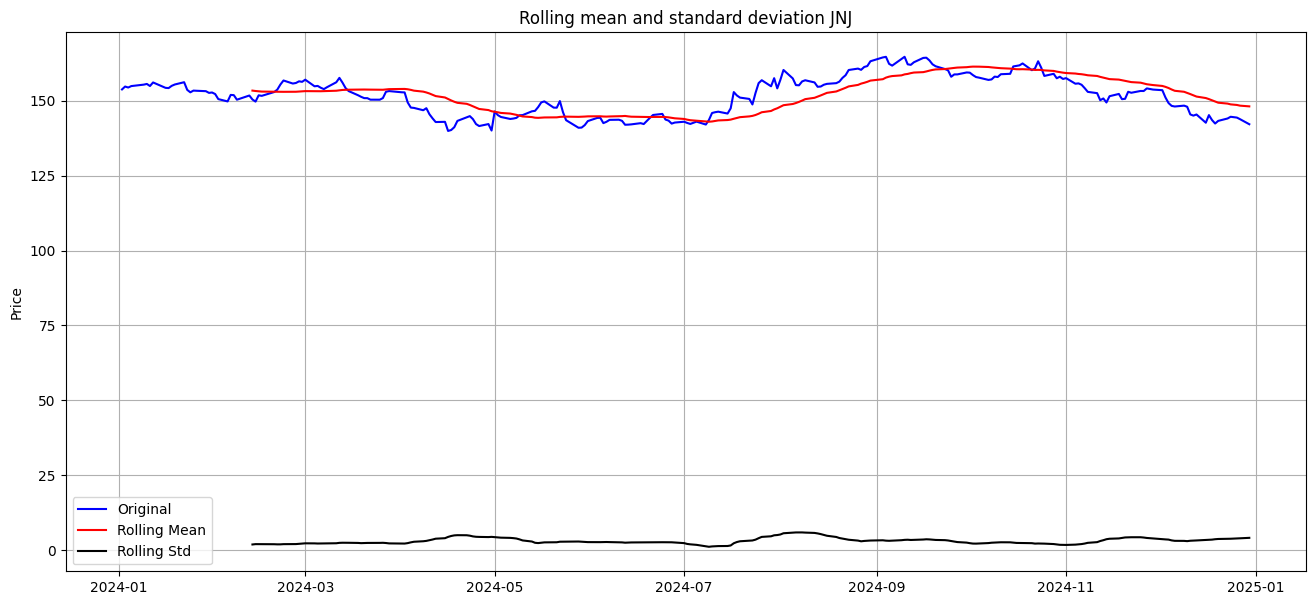

In [23]:
# code for rolling mean
rolling_mean = df['Close'].rolling(window=30).mean()  # Calculate rolling mean with a window of 30 days
# code for rolling STD
rolling_std = df['Close'].rolling(window=30).std()  # Calculate rolling standard deviation with a window of 30 days

plt.figure(figsize = (16, 7))
fig=plt.figure(1)

orig = plt.plot(df['Close'],color='blue',label='Original')
mean = plt.plot(rolling_mean,color='red',label='Rolling Mean')
std = plt.plot(rolling_std,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation ' + 'JNJ')
plt.grid()
plt.ylabel("Price")
plt.show()

In [24]:
# create 30 days simple moving average column
df['SMA30'] = df['Close'].rolling(window=30).mean()
# create 90 days simple moving average column
df['SMA90'] = df['Close'].rolling(window=90).mean()
# display first few rows
print(df.head(100))

Price            Close        High         Low        Open   Volume  \
Ticker             JNJ         JNJ         JNJ         JNJ      JNJ   
Date                                                                  
2024-01-02  153.829590  155.435486  150.771646  150.906271  9622100   
2024-01-03  154.791199  155.243159  153.666111  154.473864  8232000   
2024-01-04  154.464249  155.762420  154.262303  155.387391  6766600   
2024-01-05  154.945053  155.146984  153.348768  154.339231  5602500   
2024-01-08  155.329697  155.454711  153.483397  154.916209  6569800   
...                ...         ...         ...         ...      ...   
2024-05-17  149.833221  150.046384  148.932136  150.046384  6521800   
2024-05-20  147.752747  149.823449  147.742970  149.540198  7742300   
2024-05-21  147.723465  149.042067  147.283916  148.250903  5492400   
2024-05-22  149.930908  150.497424  146.824855  147.332753  6609800   
2024-05-23  146.219254  149.286243  145.906702  149.198340  8000400   

Price

### Trade signals
###### When the short term moving average crosses above the long term moving average, this indicates a buy signal.
###### Contrary, when the short term moving average crosses below the long term moving average, it may be a good moment to sell.

In [25]:
df['Signal_SMA'] = 0.0
df['Signal_SMA'] = np.where(df['SMA30'] > df['SMA90'], 1.0, 0.0)

In [26]:
df['Position_SMA'] = df['Signal_SMA'].diff()
# display first few rows
df.head()

Price,Close,High,Low,Open,Volume,SMA30,SMA90,Signal_SMA,Position_SMA
Ticker,JNJ,JNJ,JNJ,JNJ,JNJ,,,,
Date,,,,,,,,,
2024-01-02,153.829590,155.435486,150.771646,150.906271,9622100,NaN,NaN,0.0,NaN
2024-01-03,154.791199,155.243159,153.666111,154.473864,8232000,NaN,NaN,0.0,0.0
2024-01-04,154.464249,155.762420,154.262303,155.387391,6766600,NaN,NaN,0.0,0.0
2024-01-05,154.945053,155.146984,153.348768,154.339231,5602500,NaN,NaN,0.0,0.0
2024-01-08,155.329697,155.454711,153.483397,154.916209,6569800,NaN,NaN,0.0,0.0


<Figure size 2000x1000 with 0 Axes>

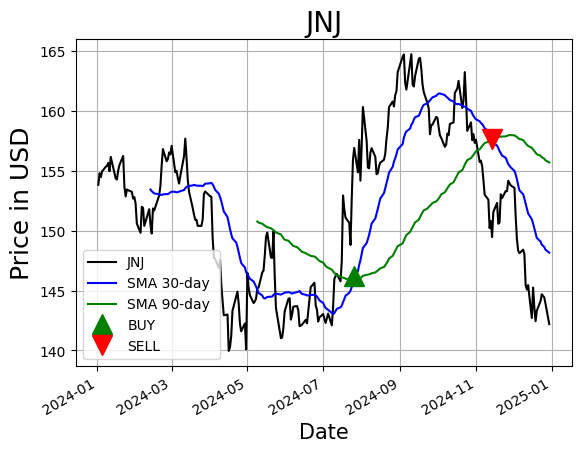

In [27]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages
df['Close'].plot(color = 'k', label= 'Close')
df['SMA30'].plot(color = 'b',label = 'SMA 30-day ')
df['SMA90'].plot(color = 'g', label = 'SMA 90-day ')
# plot ‘buy’ signals
plt.plot(df[df['Position_SMA'] == 1].index,
         df['SMA30'][df['Position_SMA'] == 1],
         '^', markersize = 15, color = 'g', label = 'BUY')
# plot ‘sell’ signals
plt.plot(df[df['Position_SMA'] == -1].index,df['SMA90'][df['Position_SMA'] == -1],'v', markersize = 15, color = 'r', label = 'SELL')
plt.ylabel('Price in USD', fontsize = 18 )
plt.xlabel('Date', fontsize = 15 )
plt.title('JNJ', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [28]:
df_position = df[(df['Position_SMA'] == 1) | (df['Position_SMA'] == -1)]
df_position['Position_SMA'] = df_position['Position_SMA'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers = 'keys', tablefmt = 'psql'))

+---------------------+--------------------+-------------------+------------------+-------------------+---------------------+-----------------+-----------------+----------------------+------------------------+
| Date                |   ('Close', 'JNJ') |   ('High', 'JNJ') |   ('Low', 'JNJ') |   ('Open', 'JNJ') |   ('Volume', 'JNJ') |   ('SMA30', '') |   ('SMA90', '') |   ('Signal_SMA', '') | ('Position_SMA', '')   |
|---------------------+--------------------+-------------------+------------------+-------------------+---------------------+-----------------+-----------------+----------------------+------------------------|
| 2024-07-26 00:00:00 |            156.905 |           157.823 |          155.762 |           156.036 |             8356900 |         146.202 |         145.903 |                    1 | Buy                    |
| 2024-11-14 00:00:00 |            149.465 |           151.157 |          148.372 |           150.754 |             7716400 |         157.471 |         157.627 

### Exponential Moving Average Technique (JNJ Stock)

Price            Close       EMA30
Ticker             JNJ            
Date                              
2024-01-02  153.829590  153.829590
2024-01-03  154.791199  153.891629
2024-01-04  154.464249  153.928572
2024-01-05  154.945053  153.994152
2024-01-08  155.329697  154.080316
2024-01-09  155.425858  154.167125
2024-01-10  155.656631  154.263222
2024-01-11  154.964264  154.308451
2024-01-12  156.156677  154.427691
2024-01-16  154.358459  154.423225


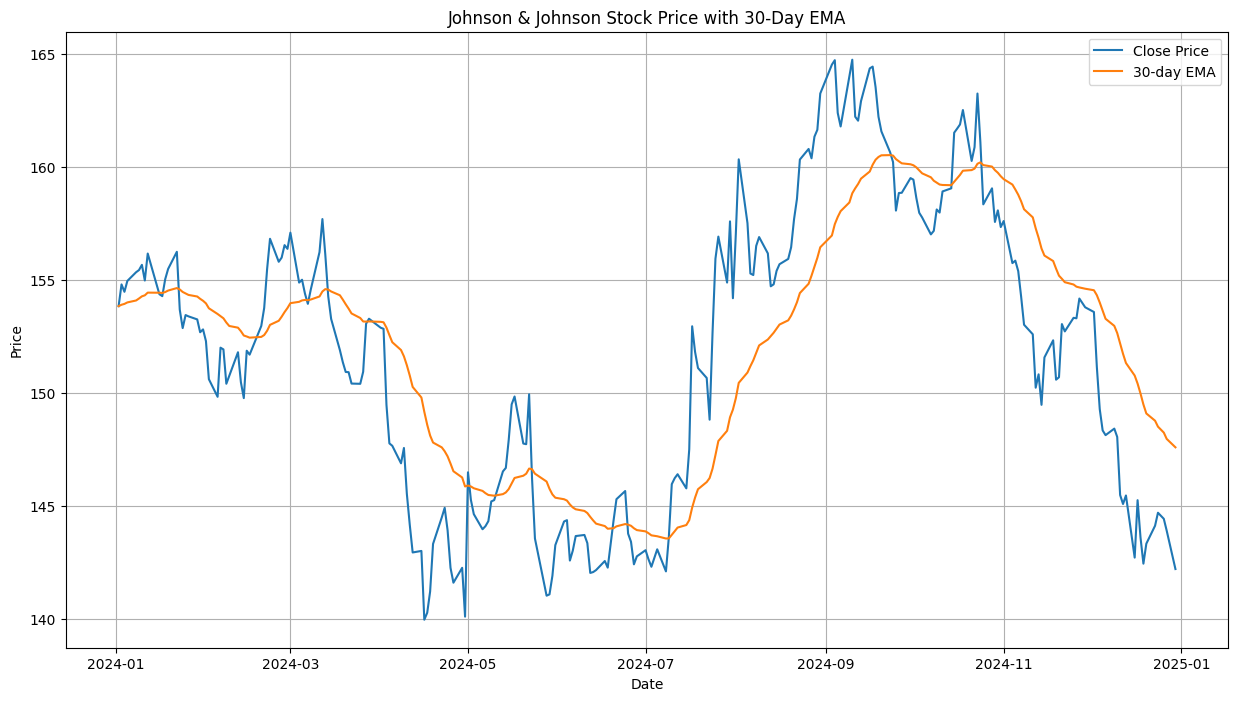

In [29]:
#EMA for 30 days
df['EMA30'] = df['Close'].ewm(span=30, adjust=False).mean()

# Print the DataFrame with the EMA
print(df[['Close', 'EMA30']].head(10))

# Plot the closing price and the EMA
plt.figure(figsize=(15, 8))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['EMA30'], label='30-day EMA')
plt.title('Johnson & Johnson Stock Price with 30-Day EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

Price            Close       EMA90
Ticker             JNJ            
Date                              
2024-01-02  153.829590  153.829590
2024-01-03  154.791199  153.850724
2024-01-04  154.464249  153.864208
2024-01-05  154.945053  153.887963
2024-01-08  155.329697  153.919649
2024-01-09  155.425858  153.952753
2024-01-10  155.656631  153.990201
2024-01-11  154.964264  154.011609
2024-01-12  156.156677  154.058753
2024-01-16  154.358459  154.065340


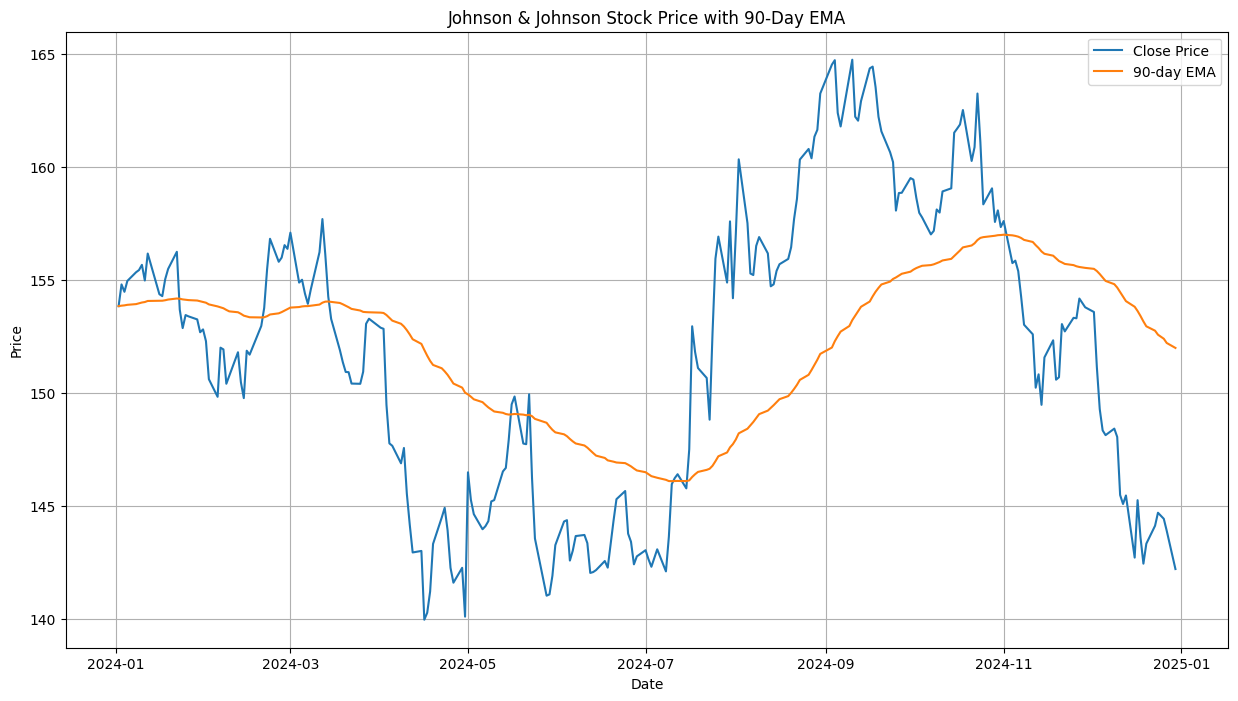

In [30]:
#EMA for 90 days
df['EMA90'] = df['Close'].ewm(span=90, adjust=False).mean()

# Print the DataFrame with the EMA
print(df[['Close', 'EMA90']].head(10))

# Plot the closing price and the EMA
plt.figure(figsize=(15, 8))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['EMA90'], label='90-day EMA')
plt.title('Johnson & Johnson Stock Price with 90-Day EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [31]:
df['Signal_EMA'] = 0.0
df['Signal_EMA'] = np.where(df['EMA30'] > df['EMA90'], 1.0, 0.0)

In [32]:
df['Position_EMA'] = df['Signal_EMA'].diff()

In [33]:
df.head(10)

Price,Close,High,Low,Open,Volume,SMA30,SMA90,Signal_SMA,Position_SMA,EMA30,EMA90,Signal_EMA,Position_EMA
Ticker,JNJ,JNJ,JNJ,JNJ,JNJ,,,,,,,,
Date,,,,,,,,,,,,,
2024-01-02,153.829590,155.435486,150.771646,150.906271,9622100,NaN,NaN,0.0,NaN,153.829590,153.829590,0.0,NaN
2024-01-03,154.791199,155.243159,153.666111,154.473864,8232000,NaN,NaN,0.0,0.0,153.891629,153.850724,1.0,1.0
2024-01-04,154.464249,155.762420,154.262303,155.387391,6766600,NaN,NaN,0.0,0.0,153.928572,153.864208,1.0,0.0
2024-01-05,154.945053,155.146984,153.348768,154.339231,5602500,NaN,NaN,0.0,0.0,153.994152,153.887963,1.0,0.0
2024-01-08,155.329697,155.454711,153.483397,154.916209,6569800,NaN,NaN,0.0,0.0,154.080316,153.919649,1.0,0.0
2024-01-09,155.425858,157.012517,154.435395,155.425858,6357000,NaN,NaN,0.0,0.0,154.167125,153.952753,1.0,0.0
2024-01-10,155.656631,156.377843,155.012351,155.608562,4945100,NaN,NaN,0.0,0.0,154.263222,153.990201,1.0,0.0
2024-01-11,154.964264,155.973963,154.608471,155.848963,4946000,NaN,NaN,0.0,0.0,154.308451,154.011609,1.0,0.0


<Figure size 2000x1000 with 0 Axes>

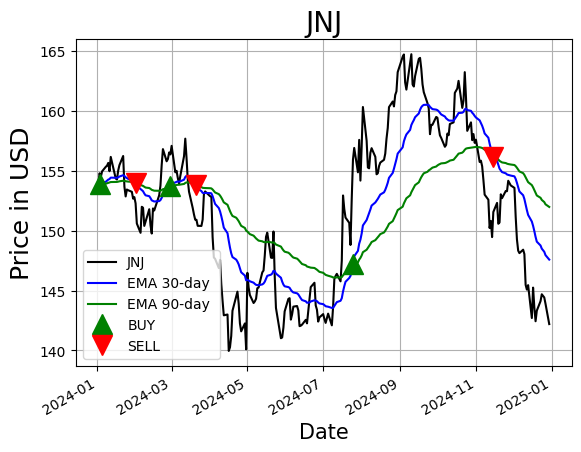

In [34]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages
df['Close'].plot(color = 'k', label= 'Close')
df['EMA30'].plot(color = 'b',label = 'EMA 30-day ')
df['EMA90'].plot(color = 'g', label = 'EMA 90-day ')
# plot ‘buy’ signals
plt.plot(df[df['Position_EMA'] == 1].index,
         df['EMA30'][df['Position_EMA'] == 1],
         '^', markersize = 15, color = 'g', label = 'BUY')
# plot ‘sell’ signals
plt.plot(df[df['Position_EMA'] == -1].index,
         df['EMA90'][df['Position_EMA'] == -1],
         'v', markersize = 15, color = 'r', label = 'SELL')
plt.ylabel('Price in USD', fontsize = 18 )
plt.xlabel('Date', fontsize = 15 )
plt.title('JNJ', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [35]:
df_position = df[(df['Position_EMA'] == 1) | (df['Position_EMA'] == -1)]
df_position['Position_EMA'] = df_position['Position_EMA'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers = 'keys', tablefmt = 'psql'))

+---------------------+--------------------+-------------------+------------------+-------------------+---------------------+-----------------+-----------------+----------------------+------------------------+-----------------+-----------------+----------------------+------------------------+
| Date                |   ('Close', 'JNJ') |   ('High', 'JNJ') |   ('Low', 'JNJ') |   ('Open', 'JNJ') |   ('Volume', 'JNJ') |   ('SMA30', '') |   ('SMA90', '') |   ('Signal_SMA', '') |   ('Position_SMA', '') |   ('EMA30', '') |   ('EMA90', '') |   ('Signal_EMA', '') | ('Position_EMA', '')   |
|---------------------+--------------------+-------------------+------------------+-------------------+---------------------+-----------------+-----------------+----------------------+------------------------+-----------------+-----------------+----------------------+------------------------|
| 2024-01-03 00:00:00 |            154.791 |           155.243 |          153.666 |           154.474 |             82

### 6. Forecasting

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4ss0033v/pw9_hfn5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4ss0033v/eldp8ltd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64759', 'data', 'file=/tmp/tmp4ss0033v/pw9_hfn5.json', 'init=/tmp/tmp4ss0033v/eldp8ltd.json', 'output', 'file=/tmp/tmp4ss0033v/prophet_modelplt49v4e/prophet_model-20250419020746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:07:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:07:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


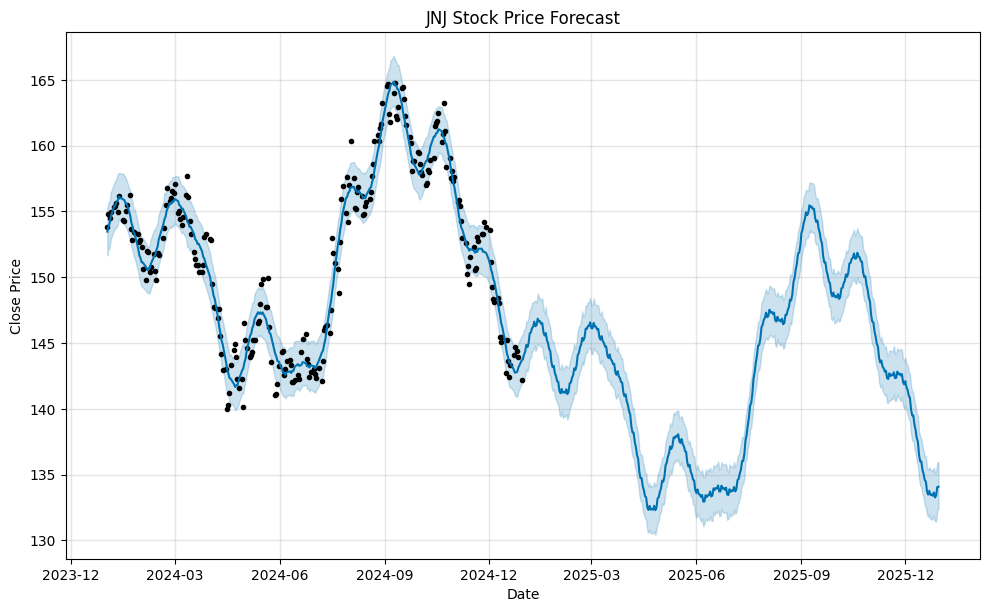

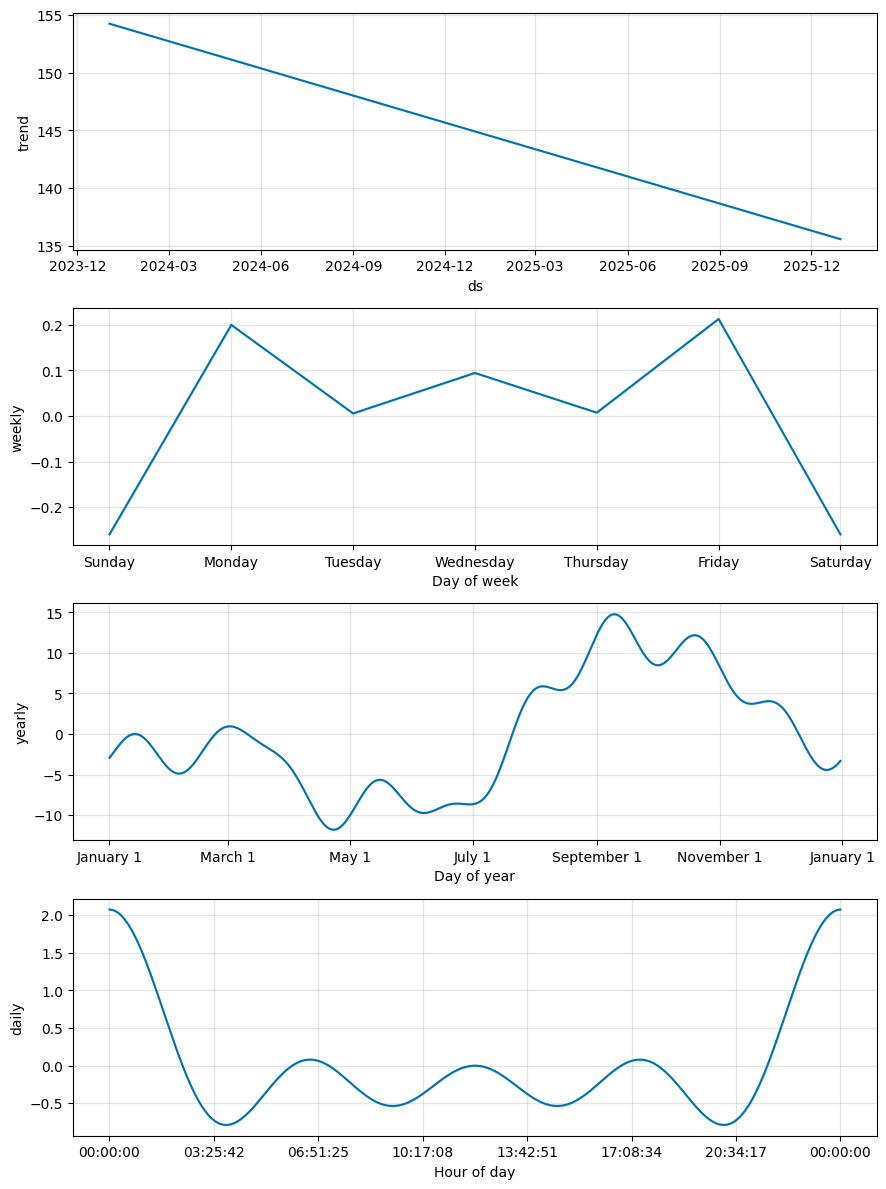

In [36]:
from prophet import Prophet

# Step 1: Download Historical Stock Prices
df = jnj_data.copy()

# Step 2: Prepare Data for Prophet
df = df.reset_index()[['Date', 'Close']]
df.columns = ['ds', 'y']  # Prophet expects 'ds' and 'y'
df['ds'] = pd.to_datetime(df['ds'])

# Step 3: Initialize Prophet Model
model = Prophet(daily_seasonality=True, yearly_seasonality=True)
model.fit(df)

# Step 4: Create Future DataFrame
future = model.make_future_dataframe(periods=365)  # forecast 1 year ahead

# Step 5: Forecast
forecast = model.predict(future)

# Step 6: Plot Forecast
model.plot(forecast)
plt.title(f"JNJ Stock Price Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

# Step 7: Plot Components (Trend & Seasonality)
model.plot_components(forecast)
plt.show()

In [37]:
# Step 8: View Forecasted Values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())


          ds        yhat  yhat_lower  yhat_upper
0 2024-01-02  153.459741  151.661324  155.301202
1 2024-01-03  153.849238  152.125439  155.661657
2 2024-01-04  154.069249  152.232842  155.769002
3 2024-01-05  154.580573  152.878209  156.427683
4 2024-01-08  155.406526  153.602863  157.131881


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4ss0033v/9wlhr_kc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4ss0033v/15zt_beb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56968', 'data', 'file=/tmp/tmp4ss0033v/9wlhr_kc.json', 'init=/tmp/tmp4ss0033v/15zt_beb.json', 'output', 'file=/tmp/tmp4ss0033v/prophet_modelq6hz1h_1/prophet_model-20250419020747.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:07:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:07:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


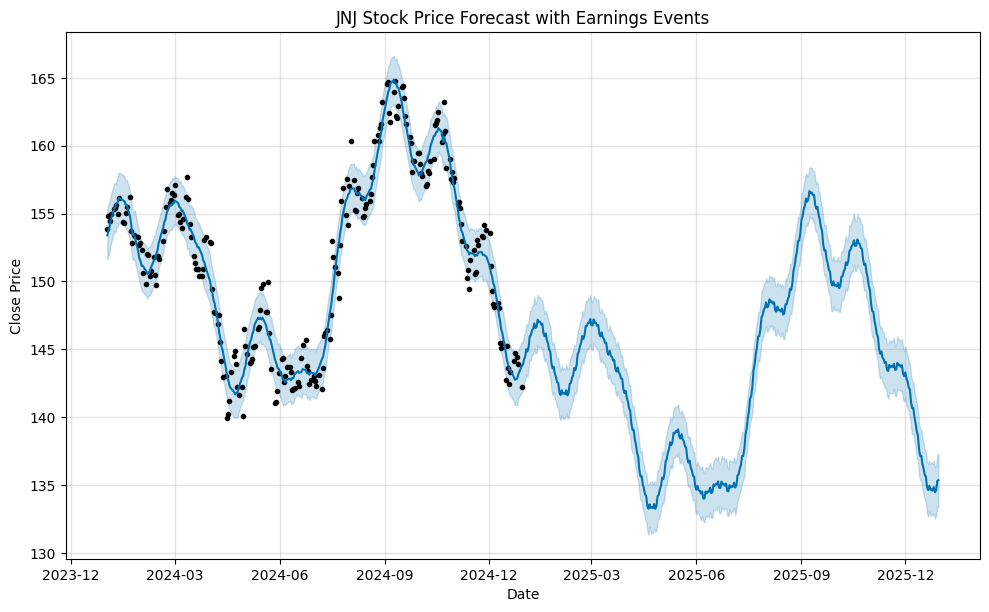

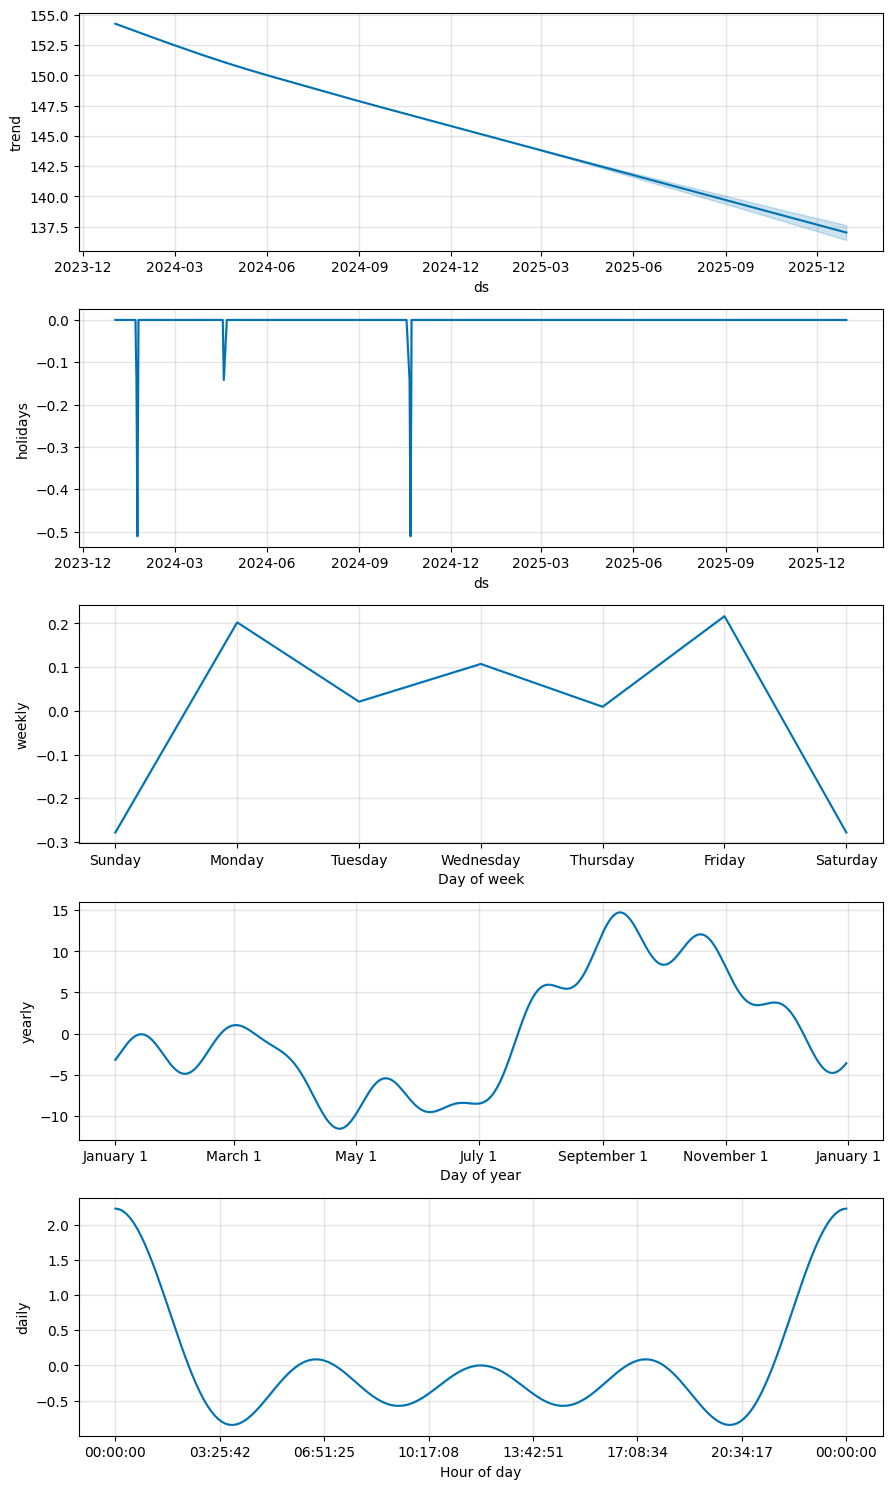

In [38]:
# Step 1: Prepare your 1-year JNJ stock data
df = jnj_data.copy()
df = df.reset_index()[['Date', 'Close']]
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

# Step 2: Add US Holidays
model = Prophet(
    daily_seasonality=True,
    yearly_seasonality=True,
    holidays=make_holidays_df(year_list=[2024, 2025], country='US')
)

# Step 3: Initialize Prophet with holidays, custom events, and more flexibility
model = Prophet(
    daily_seasonality=True,
    yearly_seasonality=True,
    changepoint_prior_scale=0.2,
    holidays=earnings
)

# Step 4: Fit the model
model.fit(df)

# Step 5: Create future dataframe (1 year into 2025)
future = model.make_future_dataframe(periods=365)

# Step 6: Forecast
forecast = model.predict(future)

# Step 7: Plot forecast
fig1 = model.plot(forecast)
plt.title("JNJ Stock Price Forecast with Earnings Events")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

# Step 8: Plot forecast components (trend, yearly, earnings impact)
fig2 = model.plot_components(forecast)
plt.show()
